In [13]:
import cv2 

from diploma.utils import estimate_blur, estimate_pitch, estimate_yaw, crop_by_coordinates
from diploma.models.detector import FaceDetectorONNX
from diploma.drawing import draw_images
from diploma.models import bestframe_score

In [2]:
detector = FaceDetectorONNX("E:\kbtu_courses\diploma_project\src\diploma\models\detector\weights\model_detector.onnx")

In [3]:
x = cv2.imread('E:\kbtu_courses\diploma_project\src\diploma\photos\SCRFD_check\Big_photo.jpg')
x1 = cv2.imread('E:/kbtu_courses/diploma_project/src/diploma/photos/blur_2.jpg')
x2 = cv2.imread('E:/kbtu_courses/diploma_project/src/diploma/photos/blur_1.jpg')

In [4]:
boxes, landmarks = detector(x, input_size=(640, 640))
boxes1, landmarks1 = detector(x1, input_size=(640, 640))
boxes2, landmarks2 = detector(x2, input_size=(640, 640))

In [5]:
crop = crop_by_coordinates(x, boxes[0, :4])
crop1 = crop_by_coordinates(x1, boxes1[0, :4])
crop2 = crop_by_coordinates(x2, boxes2[0, :4])

In [7]:
print(estimate_pitch(landmarks[0]))
print(estimate_pitch(landmarks1[0]))
print(estimate_pitch(landmarks2[0]))

0.053645696
-0.16223025
-0.19386996


In [8]:
print(estimate_yaw(landmarks[0]))
print(estimate_yaw(landmarks1[0]))
print(estimate_yaw(landmarks2[0]))

-0.08516197373360457
0.028071027410019767
-0.10804596989364668


In [10]:
print(estimate_blur(crop))
print(estimate_blur(crop1))
print(estimate_blur(crop2))

25.242550821934863
31.956132273634687
83.3808476052952


In [16]:
print(bestframe_score(estimate_pitch(landmarks[0]), estimate_yaw(landmarks[0]), estimate_blur(crop)))
print(bestframe_score(estimate_pitch(landmarks1[0]), estimate_yaw(landmarks1[0]), estimate_blur(crop1)))
print(bestframe_score(estimate_pitch(landmarks2[0]), estimate_yaw(landmarks2[0]), estimate_blur(crop2)))

-313.6283415142414
-368.7105667402261
-179.35778484214242


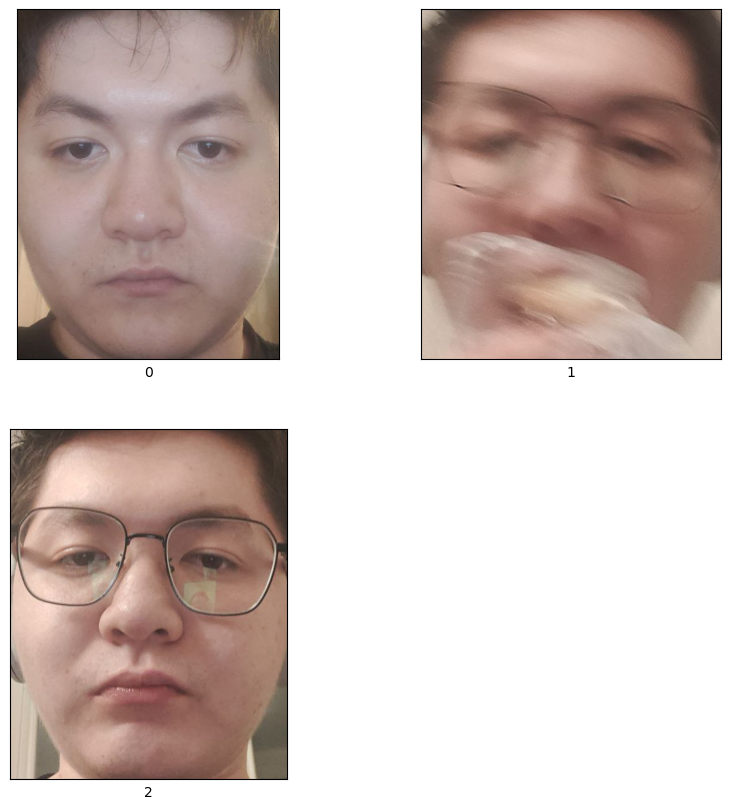

In [17]:
# чё то говно а не blur надо менять формулу
draw_images(images=[crop, crop1, crop2], image_num=3, read_images=False)